##day 11(29-05)

In [26]:
import pandas as pd 
data = pd.read_csv("/content/forecast data and original dat from may 1 to may 30.csv")

In [31]:
data.head(11)

AirTC        Date  Temperature  Unnamed: 3       mse       rmse
0   29.420235  01-05-2023    31.401120         NaN  1.980885   3.923906
1   27.299643  02-05-2023    31.470782         NaN  4.171139  17.398398
2   28.809167  03-05-2023    31.540443         NaN  2.731276   7.459869
3   29.077500  04-05-2023    31.610104         NaN  2.532604   6.414082
4   29.361190  05-05-2023    31.679765         NaN  2.318574   5.375787
5   26.971928  06-05-2023    31.749426         NaN  4.777498  22.824490
6   29.307195  07-05-2023    31.819087         NaN  2.511892   6.309601
7   30.387262  08-05-2023    31.888748         NaN  1.501486   2.254461
8   31.698353  09-05-2023    31.958409         NaN  0.260056   0.067629
9   32.556721  10-05-2023    32.028070         NaN -0.528651   0.279472
10  30.108000  11-05-2023    32.097732         NaN  1.989732   3.959032

In [28]:
data.tail()

AirTC        Date  Temperature  Unnamed: 3       mse       rmse
21  31.805357  22-05-2023    32.864004         NaN  1.058647   1.120733
22  32.232625  23-05-2023    32.933665         NaN  0.701040   0.491457
23  34.626444  24-05-2023    33.003326         NaN -1.623118   2.634513
24  33.324167  25-05-2023    33.072987         NaN -0.251179   0.063091
25  28.106087  26-05-2023    33.142648         NaN  5.036561  25.366950

<ipython-input-17-eb4fd621eb18>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.to_datetime(data["Date"])


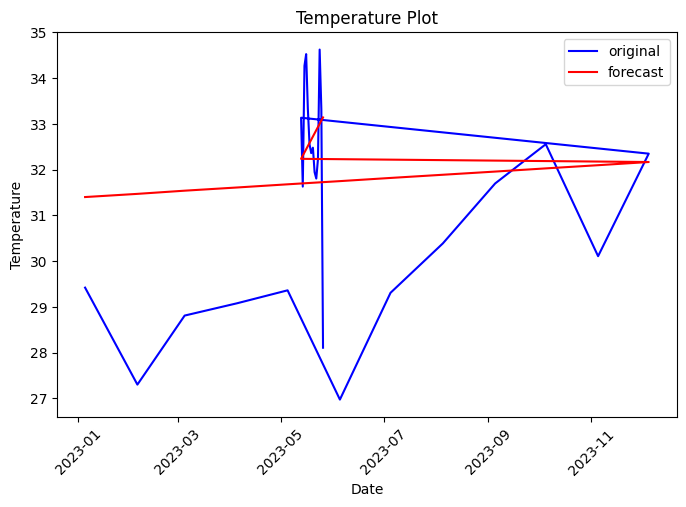

<ipython-input-30-114996261ce5>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.to_datetime(data["Date"])


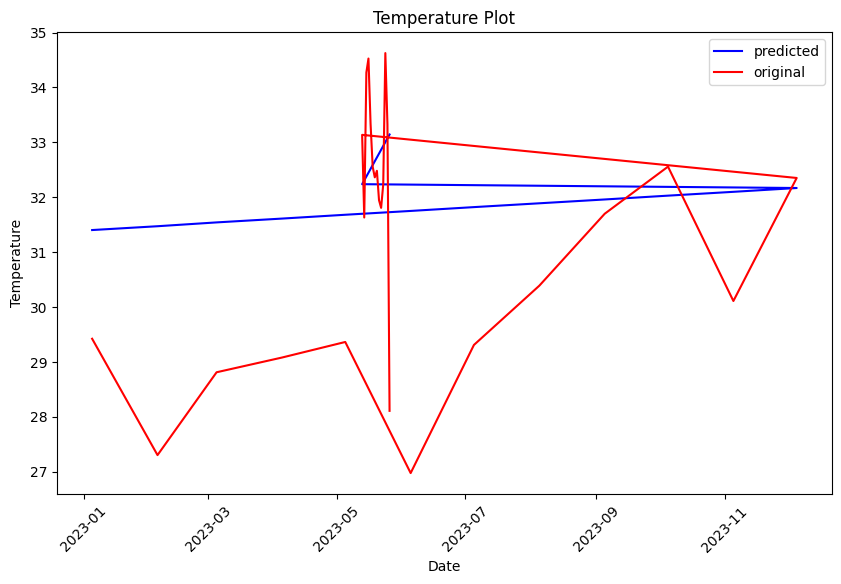

In [30]:
import matplotlib.pyplot as plt

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature_col1 = data["Temperature"].values
temperature_col2 = data["AirTC"].values

# Plot the temperature values
plt.figure(figsize=(10, 6))
plt.plot(dates, temperature_col1, color='blue', label='predicted')
plt.plot(dates, temperature_col2, color='red', label='original')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Plot')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [36]:
import matplotlib.dates as mdates

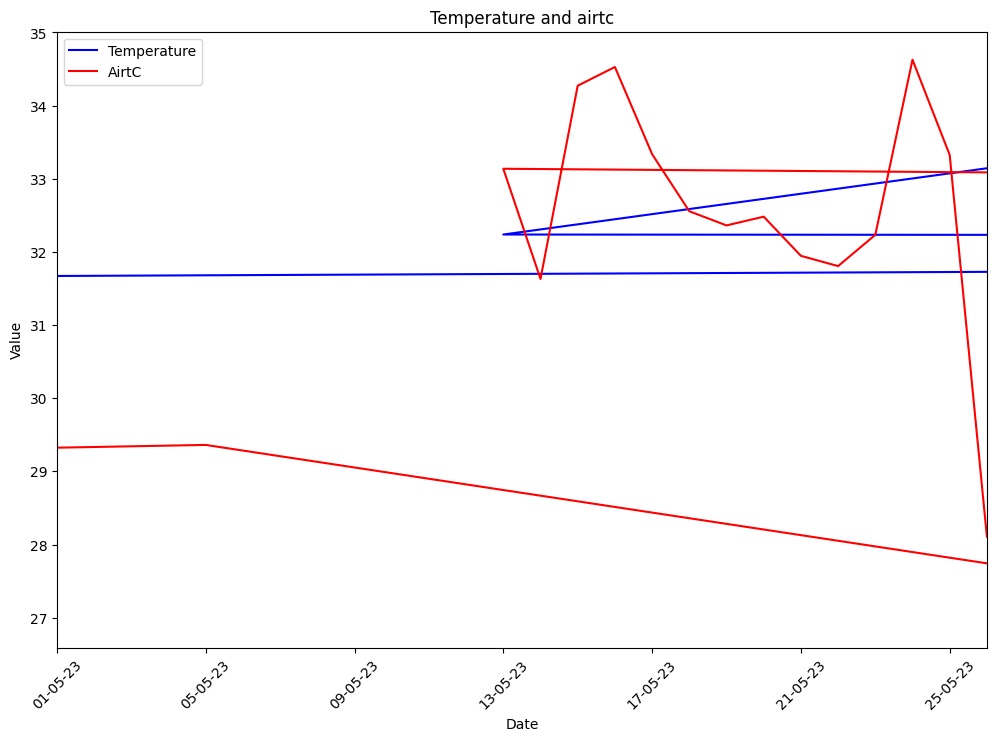

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(dates, temperature_col1, color='blue', label='Temperature')
plt.plot(dates, temperature_col2, color='red', label='AirtC')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Temperature and airtc')
plt.legend()
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2023-05-01'), pd.Timestamp('2023-05-26'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.show()


In [43]:
max = data["AirTC"].max()
min = data["AirTC"].min()
mean = data["AirTC"].mean()
print("max value in air temp: ",max)
print(min,mean)

max value in air temp:  34.62644444
26.97192771 31.295589063846155


In [44]:
max = data["Temperature"].max()
min = data["Temperature"].min()
mean = data["Temperature"].mean()
print("max value in air temp: ",max)
print(min,mean)

max value in air temp:  33.1426483
31.40112044 32.27188436884616


In [46]:
import numpy as np

In [50]:
#percentage error between the temperature and predicted output 
# Calculate the absolute difference between temperature and AirTC
absolute_difference = np.abs(temperature_col2- temperature_col1)

# Calculate the percentage error
percentage_error = (absolute_difference / temperature_col2) * 100

# Print the percentage error
print("Percentage Error:", percentage_error)



Percentage Error: [ 6.73307039 15.27909618  9.48057968  8.70984019  7.89673165 17.71285446
  8.57090554  4.94117023  0.82040985  1.62378403  6.60864747  0.56522356
  2.71278601  2.14048093  5.52899528  6.02692678  2.45992333  0.0923296
  0.90685675  0.75037587  2.65608786  3.32851694  2.17493909  4.68751094
  0.75374575 17.91982408]


In [55]:
range_1_5 = []
range_5_10 = []
range_11_15 = []
range_15_20 =[]

# Segregate the values based on ranges
for error in percentage_error:
    if 1 <= error <= 5:
        range_1_5.append(error)
    elif 5 < error <= 10:
        range_5_10.append(error)
    elif 10 < error <= 15:
        range_11_15.append(error)
    elif 15 < error <= 20:
        range_15_20.append(error)
# Print the segregated values
print("Values in range 1-5:", range_1_5,"count",len(range_1_5))
print("Values in range 5-10:", range_5_10)
print("Values in range 11-15:", range_11_15)
print("Values in range 15-20:", range_15_20)


Values in range 1-5: [4.941170234228979, 1.623784025935127, 2.7127860132107027, 2.14048093266808, 2.4599233253188313, 2.6560878573268307, 3.328516939269309, 2.1749390873377603, 4.687510936366877] count 9
Values in range 5-10: [6.733070386671265, 9.480579675510626, 8.709840185710597, 7.896731645058273, 8.570905539458531, 6.608647469111202, 5.5289952751236005, 6.026926781750174]
Values in range 11-15: []
Values in range 15-20: [15.27909618228611, 17.71285445878129, 17.919824083544352]


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("your_dataset.csv")

# Convert time values to datetime format
df['time'] = pd.to_datetime(df['time'])

# Define the time slots (4 hours)
slot_duration = pd.Timedelta(hours=4)

# Create a new column with the corresponding time slot for each entry
df['time_slot'] = pd.cut(df['time'], pd.date_range(start=df['time'].min(), end=df['time'].max(), freq=slot_duration))

# Calculate the mean of the desired column within each time slot
mean_values = df.groupby('time_slot')['column_to_calculate_mean'].mean()

# Print the mean values within each time slot
print(mean_values)


In [ ]:
import pandas as pd

df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

df1['Time'] = pd.to_datetime(df1['Time'])

slots = ['12AM-6AM', '6AM-12PM', '12PM-6PM', '6PM-12AM']

# Map 'Time' to the corresponding hour slot in df1
df1['Hour Slot'] = pd.cut(df1['Time'].dt.hour, bins=[0, 6, 12, 18, 24], labels=slots, right=False)

# Convert 'Time' column in df2 to datetime
df2['Time'] = pd.to_datetime(df2['Time'])

# Define hour slots for df2
slots = ['12AM-6AM', '6AM-12PM', '12PM-6PM', '6PM-12AM']

# Map 'Time' to the corresponding hour slot in df2
df2['Hour Slot'] = pd.cut(df2['Time'].dt.hour, bins=[0, 6, 12, 18, 24], labels=slots, right=False)

# Merge df1 and df2 based on the 'Date' column
combined_data = pd.merge(df1, df2, on='Date')

# Print the combined dataset
print(combined_data)
